In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
y2015 = pd.read_csv('LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [14]:
#do not run this until you clean up the data 
# getting dummies for .4 mln data points is not a joke 

#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score
#
#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#y = y2015['loan_status']
#
#X = pd.get_dummies(X)
#
#cross_val_score(rfc, X, y, cv=10)

In [15]:
# let's look at all categorical variables

categorical = y2015.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
    print('New atribute:',i)
    print('Unique values: ', column.nunique())  # returns the number of unique elements in the object 
    print("Null values: ", column.isna().sum())

# some columns have many (hundreds and thousands) unique/distinct types, 
 # - drop above 30 unique values 
# - convert to numeric 


New atribute: id
Unique values:  421097
Null values:  0
New atribute: term
Unique values:  2
Null values:  2
New atribute: int_rate
Unique values:  110
Null values:  2
New atribute: grade
Unique values:  7
Null values:  2
New atribute: sub_grade
Unique values:  35
Null values:  2
New atribute: emp_title
Unique values:  120812
Null values:  23876
New atribute: emp_length
Unique values:  11
Null values:  23819
New atribute: home_ownership
Unique values:  4
Null values:  2
New atribute: verification_status
Unique values:  3
Null values:  2
New atribute: issue_d
Unique values:  12
Null values:  2
New atribute: loan_status
Unique values:  7
Null values:  2
New atribute: pymnt_plan
Unique values:  1
Null values:  2
New atribute: url
Unique values:  421095
Null values:  2
New atribute: desc
Unique values:  34
Null values:  421052
New atribute: purpose
Unique values:  14
Null values:  2
New atribute: title
Unique values:  27
Null values:  134
New atribute: zip_code
Unique values:  914
Null val

In [16]:
# How many attributes? 111

len(y2015.columns)

111

In [17]:
## Data cleaning 

# Convert ID and Interest rate to numeric 

y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015['term'] = pd.to_numeric(y2015['term'].str.strip(' months'), errors='coerce')

In [18]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,60.0,14.85,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,36.0,7.49,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,36.0,7.49,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,36.0,6.49,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,36.0,19.89,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [19]:
# Drop columns with more than 39 unique variables
# There must be a better way to do that
# 

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [20]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60.0,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60.0,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36.0,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
y2015 = y2015[:-2]

In [23]:
# Now # of attributes : 103

len(y2015.columns)

103

In [31]:
y2015.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats'

In [32]:
# 

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))


# try the model 

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop(['id', 'member_id','loan_status', 'grade' ], 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.00011277198791503906 seconds ---
mean cv score:  0.9587622101045478 with std:  0.005101367037749511
--- 391.26719784736633 seconds ---


__Third attempt at data cleaning__

__TO DO:__ Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.


- First, dive into the data that we have and see which features are most important. raw features or the generated dummies. use PCA or correlation matrices.
- Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [34]:
X


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT
0,16000.0,16000.0,16000.0,60.0,14.85,379.39,48000.0,33.18,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,9600.0,9600.0,9600.0,36.0,7.49,298.58,60000.0,22.44,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,25000.0,25000.0,25000.0,36.0,7.49,777.55,109000.0,26.02,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,28000.0,28000.0,36.0,6.49,858.05,92000.0,21.60,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,8650.0,8650.0,8650.0,36.0,19.89,320.99,55000.0,25.49,0.0,4.0,...,0,0,0,0,0,0,0,0,1,0
5,23000.0,23000.0,23000.0,60.0,8.49,471.77,64000.0,18.28,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,29900.0,29900.0,29900.0,60.0,12.88,678.49,65000.0,21.77,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7,18000.0,18000.0,18000.0,60.0,11.99,400.31,112000.0,8.68,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
8,35000.0,35000.0,35000.0,60.0,14.85,829.90,110000.0,17.06,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
9,10400.0,10400.0,10400.0,60.0,22.45,289.91,104433.0,25.37,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# Trying correlation matrix -- insane

cor_val = X.corr()

In [48]:
#cor_val[cor_val.mean()>.05]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_credit_pull_d_May-2015,last_credit_pull_d_May-2016,last_credit_pull_d_Nov-2015,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT
loan_amnt,1.000000,1.000000,0.999994,0.406855,0.140572,0.941205,0.305734,0.006103,-0.010424,-0.039040,...,0.000319,0.002048,0.002522,0.003849,-0.000398,0.009984,0.000568,-0.004610,-0.016880,0.016880
funded_amnt,1.000000,1.000000,0.999994,0.406855,0.140572,0.941205,0.305734,0.006103,-0.010424,-0.039040,...,0.000319,0.002048,0.002522,0.003849,-0.000398,0.009984,0.000568,-0.004610,-0.016880,0.016880
funded_amnt_inv,0.999994,0.999994,1.000000,0.406743,0.140209,0.941187,0.305803,0.006044,-0.010448,-0.039103,...,0.000331,0.002051,0.002531,0.003850,-0.000394,0.009988,0.000578,-0.004605,-0.016832,0.016832
term,0.406855,0.406855,0.406743,1.000000,0.438808,0.127869,0.047360,0.039593,-0.008665,-0.008488,...,0.000151,-0.001953,-0.000307,-0.002119,-0.001484,0.011139,-0.003455,-0.001529,-0.015208,0.015208
installment,0.941205,0.941205,0.941187,0.127869,0.124426,1.000000,0.297393,0.001893,-0.002129,-0.006255,...,0.000934,0.003880,0.003486,0.006806,0.001181,0.018691,0.002285,-0.002827,-0.015129,0.015129
annual_inc,0.305734,0.305734,0.305803,0.047360,-0.090399,0.297393,1.000000,-0.068237,0.037910,0.022990,...,-0.000536,-0.000272,-0.000271,-0.001767,-0.001858,-0.005633,0.001250,-0.003269,0.008627,-0.008627
open_acc,0.188214,0.188214,0.188212,0.086865,-0.012985,0.169995,0.122328,0.104364,0.040005,0.159144,...,-0.001580,-0.006877,-0.004309,-0.001515,-0.005219,-0.004271,-0.006863,0.005028,0.005119,-0.005119
revol_bal,0.334656,0.334656,0.334664,0.086874,-0.057412,0.314090,0.270174,0.048135,-0.035801,-0.012303,...,0.002544,0.000280,-0.001844,-0.004679,-0.001107,-0.009223,0.003149,-0.007069,0.002936,-0.002936
total_acc,0.208430,0.208430,0.208464,0.101139,-0.040211,0.183509,0.159804,0.080499,0.114623,0.161029,...,0.001559,0.000785,0.000958,0.007537,0.000843,0.004011,-0.002237,0.011970,0.001185,-0.001185
out_prncp,0.623926,0.623926,0.623858,0.438012,0.106315,0.506732,0.171780,0.022774,0.000939,-0.061121,...,-0.026743,-0.076878,-0.050008,-0.121041,-0.048870,-0.204463,-0.046540,-0.074969,-0.025306,0.025306


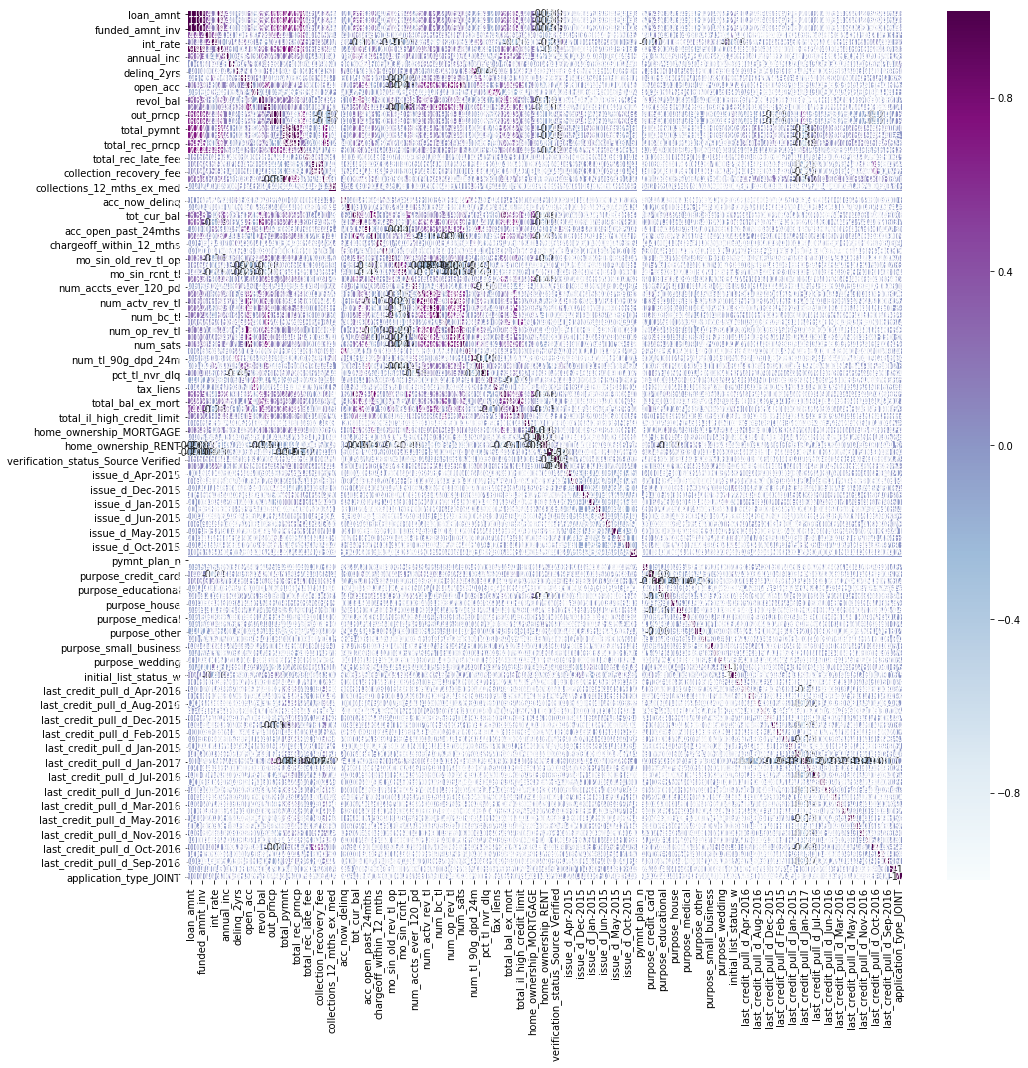

In [50]:
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(cor_val, annot=True, cmap='BuPu')

In [58]:
pd.options.display.max_seq_items = 2000
print(X.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'pub_rec_bankruptcie

In [64]:
pd.options.display.max_seq_items = 2000
print(y2015.columns)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats'

In [66]:
y2015.drop(['id', 'member_id'], axis=1, inplace=True)

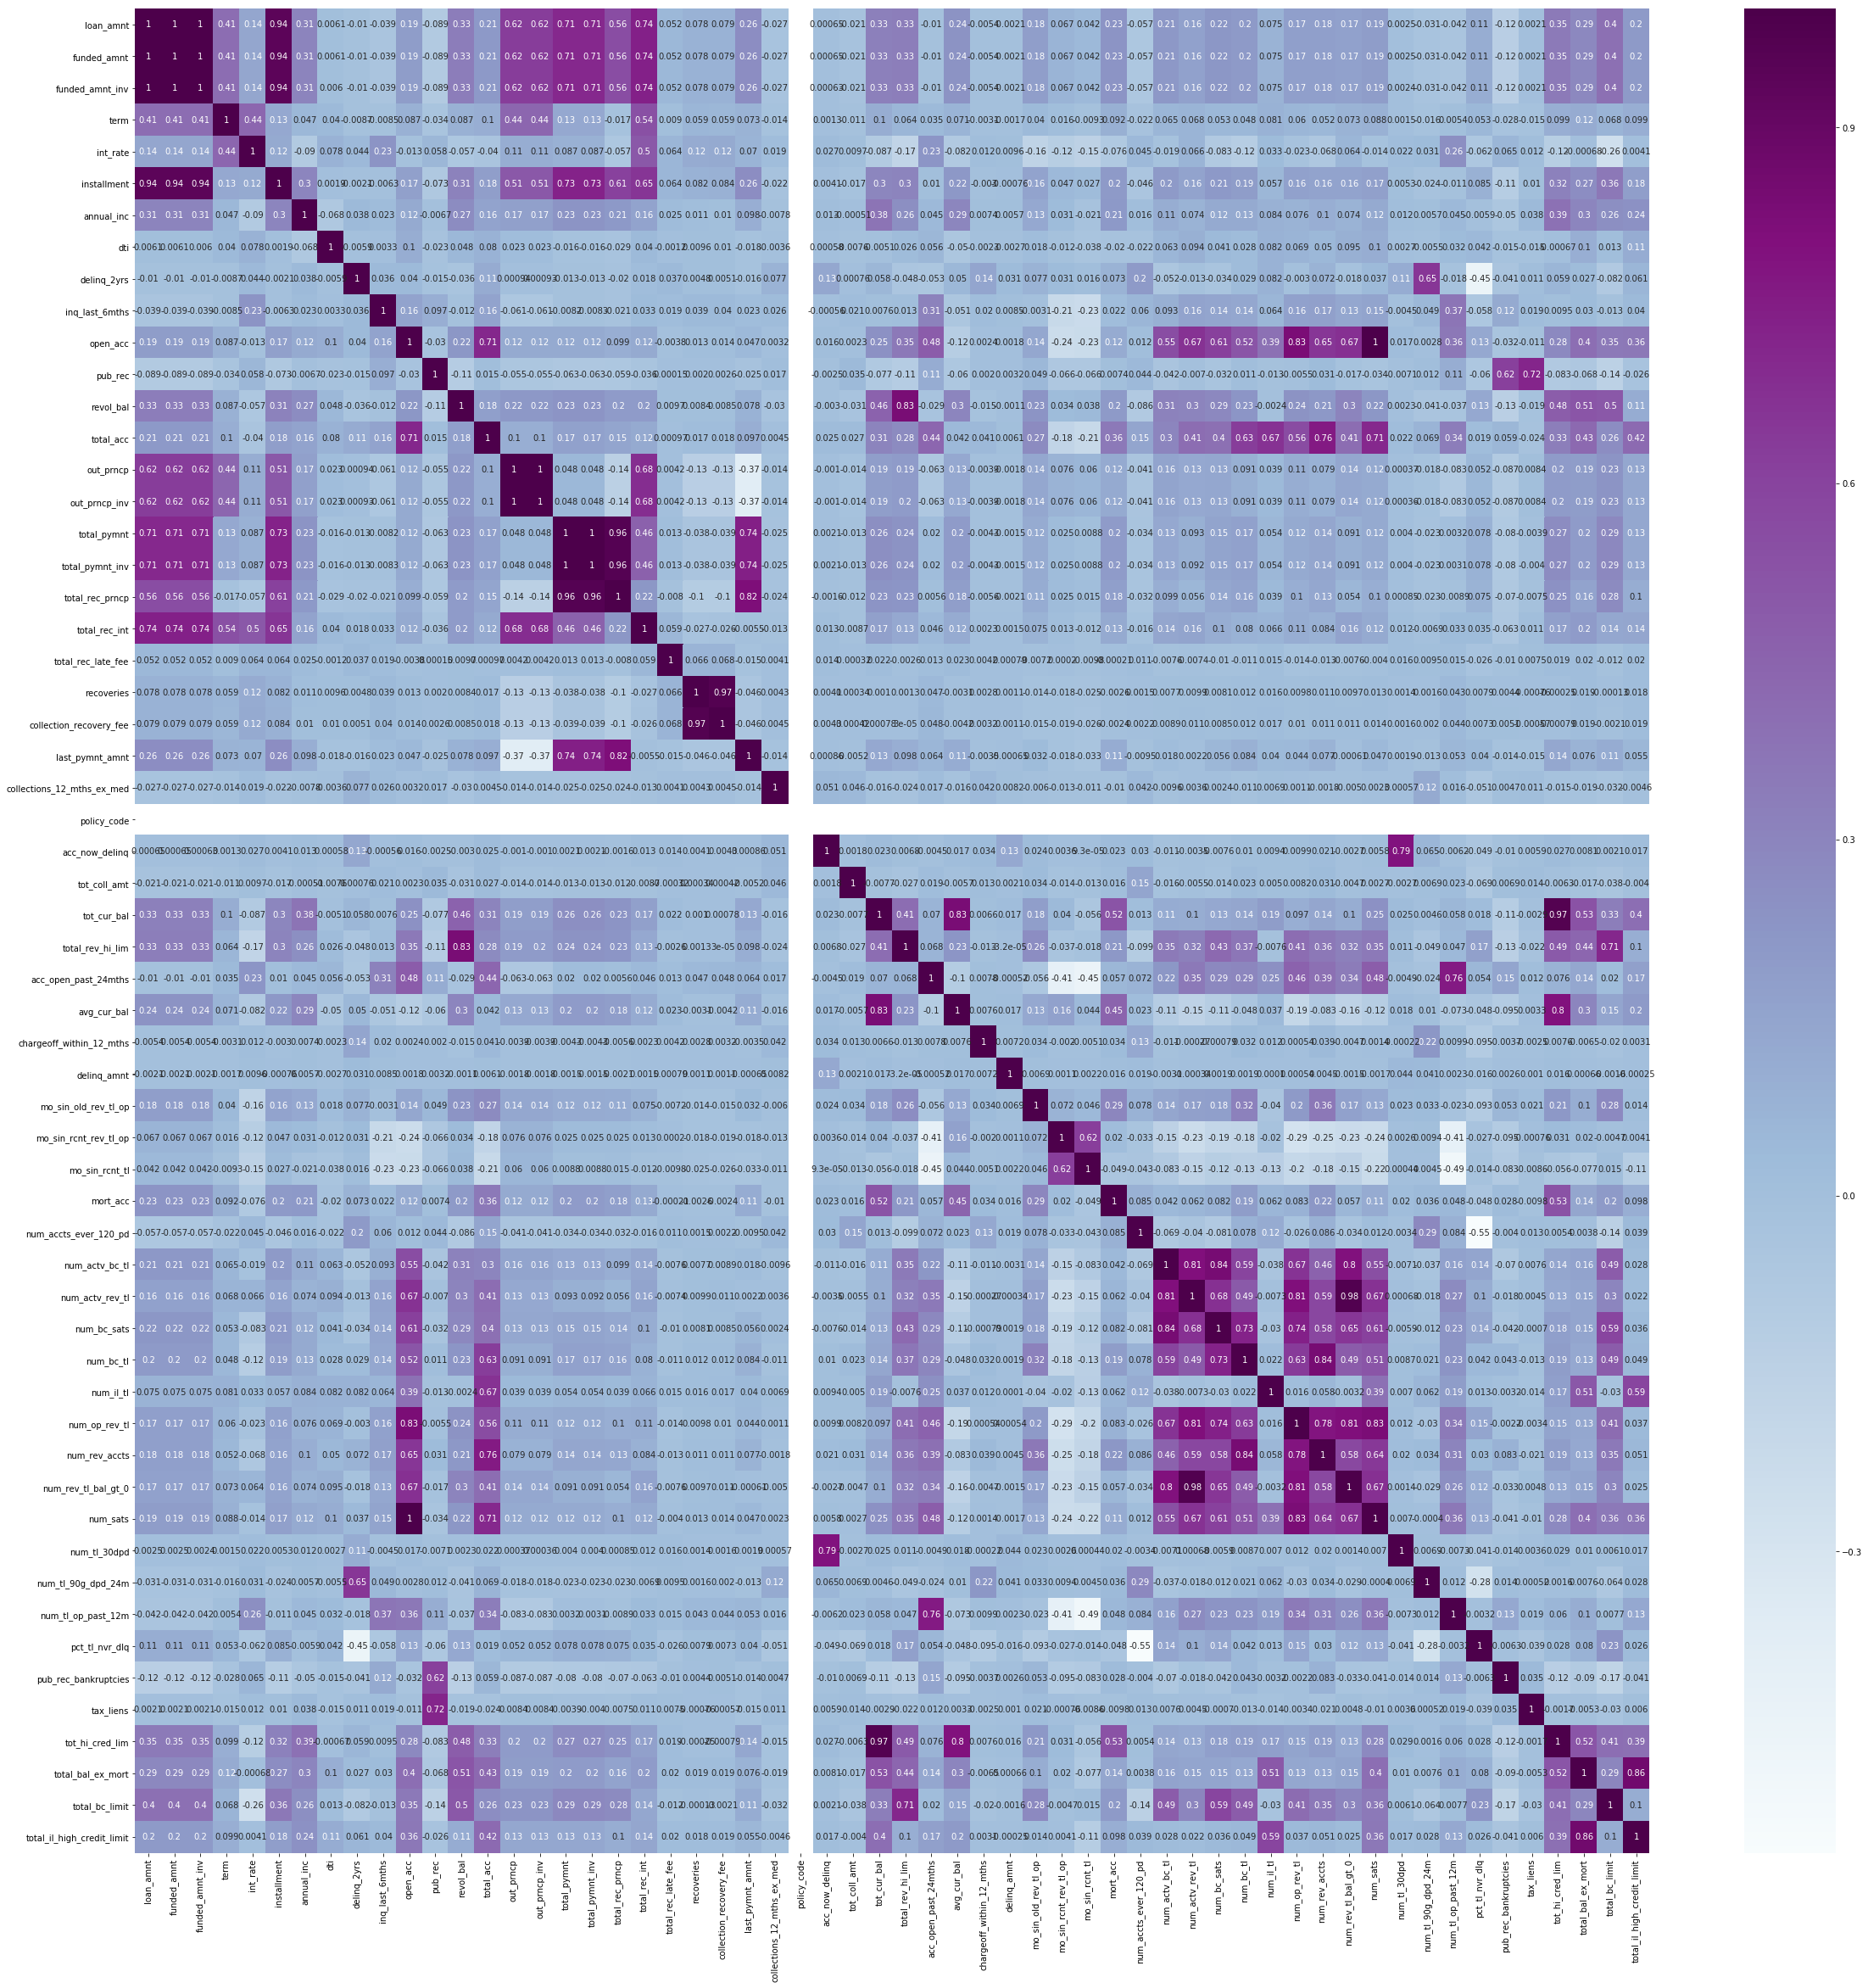

In [69]:
plt.figure(figsize=(40, 40))
sns.heatmap(y2015.corr(), annot=True, cmap='BuPu')

In [ ]:
#X.drop(X, axis=1, inplace=True)

In [61]:
##X_1 = X.drop(['verification_status_Verified',
#       'issue_d_Apr-2015', 'issue_d_Aug-2015', 'issue_d_Dec-2015',
#       'issue_d_Feb-2015', 'issue_d_Jan-2015', 'issue_d_Jul-2015',
#       'issue_d_Jun-2015', 'issue_d_Mar-2015', 'issue_d_May-2015',
#       'issue_d_Nov-2015', 'issue_d_Oct-2015', 'issue_d_Sep-2015', 'initial_list_status_f',
#       'initial_list_status_w', 'last_credit_pull_d_Apr-2015',
#       'last_credit_pull_d_Apr-2016', 'last_credit_pull_d_Aug-2015',
#       'last_credit_pull_d_Aug-2016', 'last_credit_pull_d_Dec-2014',
#       'last_credit_pull_d_Dec-2015', 'last_credit_pull_d_Dec-2016',
#       'last_credit_pull_d_Feb-2015', 'last_credit_pull_d_Feb-2016',
#       'last_credit_pull_d_Jan-2015', 'last_credit_pull_d_Jan-2016',
#       'last_credit_pull_d_Jan-2017', 'last_credit_pull_d_Jul-2015',
#       'last_credit_pull_d_Jul-2016', 'last_credit_pull_d_Jun-2015',
#       'last_credit_pull_d_Jun-2016', 'last_credit_pull_d_Mar-2015',
#       'last_credit_pull_d_Mar-2016', 'last_credit_pull_d_May-2015',
#       'last_credit_pull_d_May-2016', 'last_credit_pull_d_Nov-2015',
#       'last_credit_pull_d_Nov-2016', 'last_credit_pull_d_Oct-2015',
#       'last_credit_pull_d_Oct-2016', 'last_credit_pull_d_Sep-2015',
#       'last_credit_pull_d_Sep-2016'], axis=1, inplace=True)

In [70]:
len(y2015.columns)

68

In [71]:

# Second try with 68 attributes 

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

# try the model 

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))


--- 8.20159912109375e-05 seconds ---
mean cv score:  0.9579168061180798 with std:  0.009115818871008695
--- 375.1744508743286 seconds ---


In [81]:
y2015.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'm

In [93]:
print(y2015.isnull().sum())

id                                     0
member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
loan_status                            0
pymnt_plan                             0
purpose                                0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq            203962
mths_since_last_record            346680
open_acc                               0
pub_rec                                0
revol_bal                              0
total_acc       

In [72]:
len(y2015.columns)

68

In [86]:

# try the model -- with 68 attributes

start_time = time.time()

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc.fit(X, y)
score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))

mean cv score:  0.9591778138457844 with std:  0.0057698784458250245
--- 414.6489210128784 seconds ---


In [87]:
print(len(X.columns))
print(len(y2015.columns))  #why 128 in X but 68 in y2015?

128
68


In [88]:
# Running VarianceThreshold

from sklearn.feature_selection import VarianceThreshold  
# Feature selector removes all low-variance features (or that doesn’t meet some threshold)
# Algo looks only at X not the y, good for unsupervised Learning. 

selector = VarianceThreshold()
X_select = selector.fit_transform(X)
#X_select #Returns values of features in X and in the original index

ftr_imp = selector.variances_  #19, returns variance of each feature 
ftr_index = np.argsort(ftr_imp) ##returns index array with sorting values ascendingly n


In [89]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5



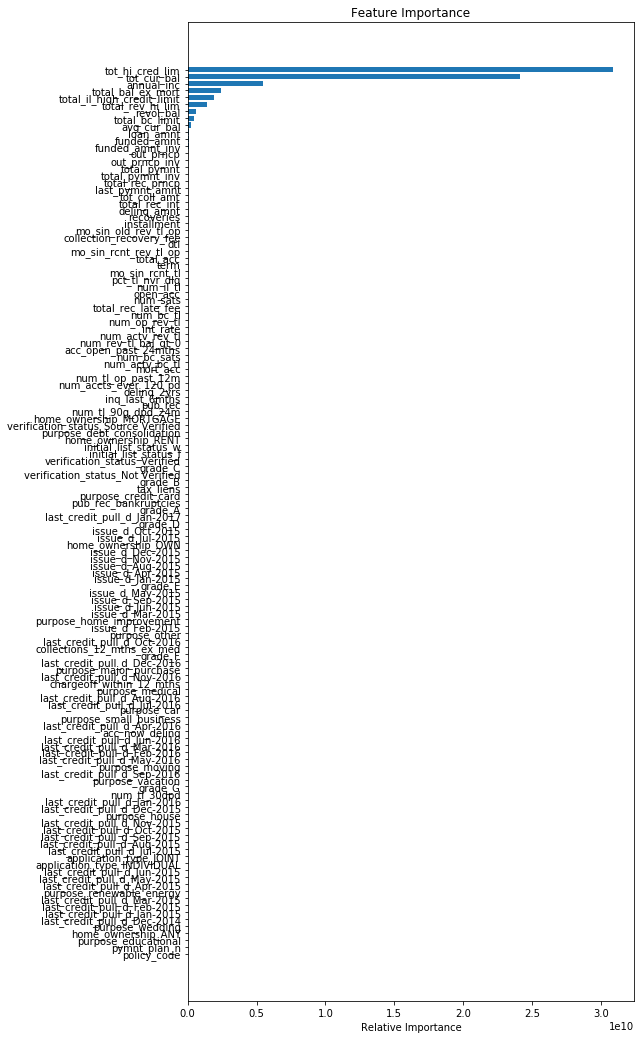

In [90]:
plt.figure(figsize=(8, 18))
plt.barh(pos, ftr_imp[ftr_index], align='center')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.yticks(pos, X.columns[ftr_index])
plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

rfc = RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

X = pd.get_dummies(X)
X = X.dropna(axis=1)

rfc.fit(X, y)

score = cross_val_score(rfc, X, y, cv=10)
print('mean cv score: ', score.mean(), 'with std: ', score.std() )
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.506111145019531e-05 seconds ---
mean cv score:  0.9580070586548477 with std:  0.008469080790370138
--- 483.3934750556946 seconds ---


In [92]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_features = np.argsort(feature_importance)
pos = np.arange(sorted_features.shape[0]) + .5



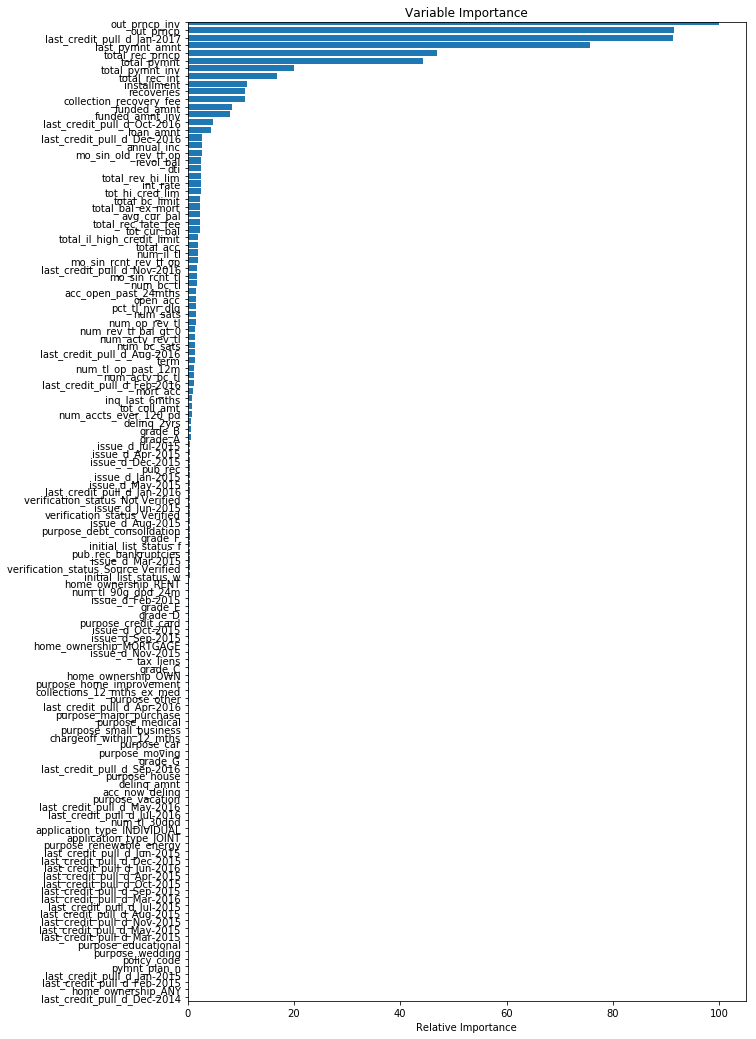

In [93]:
plt.figure(figsize=(10, 18))
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.ylim(0, 10)
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.yticks(pos, X.columns[sorted_features])
plt.show()

In [113]:
#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score
#
#rfc = ensemble.RandomForestClassifier(max_features= 50, verbose=3)
#X = y2015.drop('loan_status', 1)
#y = y2015['loan_status']
#
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)
#
#score = cross_val_score(rfc, X, y, cv=10)
#print('mean cv score: ', score.mean(), 'with std: ', score.std() )
#print("--- %s seconds ---" % (time.time() - start_time))

building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.8s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.7s remaining:    0.0s


building tree 3 of 10


KeyboardInterrupt: 